<a href="https://colab.research.google.com/github/chenphopp/marketing_segmentation/blob/main/8_Shopping_Kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder,FunctionTransformer
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import pearsonr

In [ ]:
df = pd.read_excel('Shopping.xlsx')
display(df)

,Readymade,Frozenfoods,Alcohol,FreshVegetables,Milk,Bakerygoods,Freshmeat,Toiletries,Snacks,Tinnedgoods,GENDER,Age,MARITAL,CHILDREN,WORKING
0,1,0,0,0,0,0,0,0,1,0,Female,18 to 30,Widowed,No,Yes
1,1,0,0,0,0,0,0,1,0,0,Female,18 to 30,Separated,No,Yes
2,1,0,0,0,0,0,0,1,1,0,Male,18 to 30,Single,No,Yes
3,1,0,0,0,1,1,0,0,0,0,Female,18 to 30,Widowed,No,Yes
4,1,0,0,0,0,0,0,0,0,0,Female,18 to 30,Separated,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,0,0,1,0,0,0,0,0,0,0,Male,18 to 30,Single,No,Yes
782,1,1,0,0,0,1,0,0,1,0,Male,18 to 30,Single,No,Yes
783,0,0,1,0,0,0,0,0,0,0,Male,18 to 30,Single,No,Yes
784,0,1,1,0,0,0,0,0,1,0,Male,18 to 30,Single,No,Yes


In [ ]:
df.info()

display(df.describe())

display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Readymade        786 non-null    int64 
 1   Frozenfoods      786 non-null    int64 
 2   Alcohol          786 non-null    int64 
 3   FreshVegetables  786 non-null    int64 
 4   Milk             786 non-null    int64 
 5   Bakerygoods      786 non-null    int64 
 6   Freshmeat        786 non-null    int64 
 7   Toiletries       786 non-null    int64 
 8   Snacks           786 non-null    int64 
 9   Tinnedgoods      786 non-null    int64 
 10  GENDER           786 non-null    object
 11  Age              786 non-null    object
 12  MARITAL          786 non-null    object
 13  CHILDREN         786 non-null    object
 14  WORKING          786 non-null    object
dtypes: int64(10), object(5)
memory usage: 92.2+ KB


,Readymade,Frozenfoods,Alcohol,FreshVegetables,Milk,Bakerygoods,Freshmeat,Toiletries,Snacks,Tinnedgoods
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000
mean,0.492366,0.402036,0.394402,0.082697,0.188295,0.428753,0.029262,0.099237,0.474555,0.455471
std,0.500260,0.490621,0.489033,0.275599,0.391197,0.495213,0.168648,0.299170,0.499670,0.498330
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,Readymade,Frozenfoods,Alcohol,FreshVegetables,Milk,Bakerygoods,Freshmeat,Toiletries,Snacks,Tinnedgoods,GENDER,Age,MARITAL,CHILDREN,WORKING
0,1,0,0,0,0,0,0,0,1,0,Female,18 to 30,Widowed,No,Yes
1,1,0,0,0,0,0,0,1,0,0,Female,18 to 30,Separated,No,Yes
2,1,0,0,0,0,0,0,1,1,0,Male,18 to 30,Single,No,Yes
3,1,0,0,0,1,1,0,0,0,0,Female,18 to 30,Widowed,No,Yes
4,1,0,0,0,0,0,0,0,0,0,Female,18 to 30,Separated,No,Yes


In [ ]:
# ระบุคอลัมน์ตัวเลข/หมวดหมู่ (ตามตัวอย่างไฟล์ของคุณ)
numeric_cols = ['Readymade','Frozenfoods','Alcohol','FreshVegetables','Milk',
                'Bakerygoods','Freshmeat','Toiletries','Snacks','Tinnedgoods']
categorical_cols = ['GENDER','Age','MARITAL','CHILDREN','WORKING']


In [ ]:

# สร้าง preprocessor: scale ตัวเลข + one-hot หมวดหมู่
preprocessor = ColumnTransformer([
    ("num", "passthrough", numeric_cols),
    #("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ("cat", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), categorical_cols)
])

In [ ]:
def cluster_profile(data_with_labels, label_col="Cluster", top_cat=5):
    out = {}
    for c in sorted(data_with_labels[label_col].unique()):
        sub = data_with_labels[data_with_labels[label_col]==c]
        # ตัวเลข: ค่าเฉลี่ย
        num_mean = sub[numeric_cols].mean().sort_values(ascending=False)
        # หมวดหมู่: นับสัดส่วน (เฉพาะ top_cat)
        cat_props = {}
        for col in categorical_cols:
            props = (sub[col].value_counts(normalize=True)
                     .head(top_cat).map(lambda v: f"{v:.1%}").to_dict())
            cat_props[col] = props
        out[c] = {"n": len(sub), "num_mean": num_mean.to_dict(), "cat_props": cat_props}
    return out

In [ ]:
X = preprocessor.fit_transform(df)
display(X)
X.shape


array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

(786, 26)

In [ ]:
# เอาชื่อฟีเจอร์มาใช้ตั้งคอลัมน์

ohe = preprocessor.named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(ohe.feature_names_in_)
feature_names = np.r_[numeric_cols, cat_feature_names,]

# แปลงเป็น DataFrame โดยตรงc
X_df = pd.DataFrame(X, columns=feature_names, index=df.index)


print(X_df.shape)
X_df.head()


(786, 26)


,Readymade,Frozenfoods,Alcohol,FreshVegetables,Milk,Bakerygoods,Freshmeat,Toiletries,Snacks,Tinnedgoods,...,Age_Over 60,MARITAL_Divorced,MARITAL_Married,MARITAL_Separated,MARITAL_Single,MARITAL_Widowed,CHILDREN_No,CHILDREN_Yes,WORKING_No,WORKING_Yes
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
#X_df.to_excel("Shopping_scaled.xlsx", index=False)

In [ ]:
# ลูปลอง k เพื่อดู inertia (elbow) และ silhouette
ks = range(2, 15)
inertias, sils = [], []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    inertias.append(km.inertia_)
    sils.append(silhouette_score(X, labels))

c:\Users\user\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\user\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\user\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\user\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\cluster\_kmeans.py:14

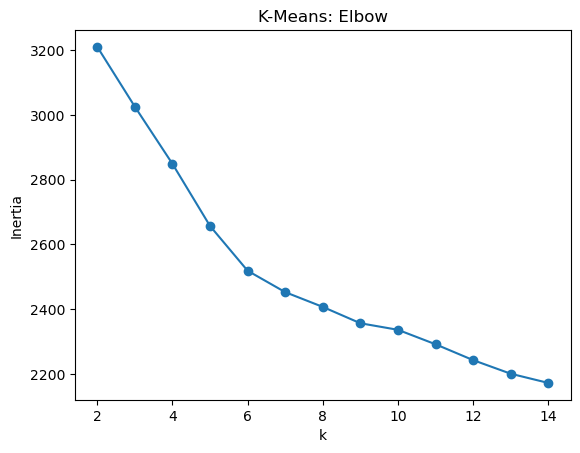

In [ ]:
# กราฟ elbow
plt.figure()
plt.plot(list(ks), inertias, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("K-Means: Elbow")
plt.show()


In [ ]:
inertias_diff = np.diff(inertias)
print("Inertia differences:", inertias_diff)
np.array(inertias).reshape(-1, 1)

Inertia differences: [-184.63903684 -176.33178869 -191.76039013 -138.0430163   -66.04303638
  -45.55177771  -50.43481645  -20.24419389  -44.59973831  -48.90231093
  -41.99445951  -28.43381976]


array([[3209.54578669],
       [3024.90674985],
       [2848.57496116],
       [2656.81457103],
       [2518.77155473],
       [2452.72851834],
       [2407.17674063],
       [2356.74192418],
       [2336.49773029],
       [2291.89799198],
       [2242.99568105],
       [2201.00122154],
       [2172.56740178]])

In [ ]:
# Create DataFrame for k, inertia, and inertia difference
inertia_df = pd.DataFrame({
    "k": list(ks),
    "inertia": inertias,
})

# Append inertia differences (aligning with k[1:])
inertia_df["inertia_diff"] = [None] + list(inertias_diff)

display(inertia_df)

,k,inertia,inertia_diff
0,2,3209.545787,NaN
1,3,3024.906750,-184.639037
2,4,2848.574961,-176.331789
3,5,2656.814571,-191.760390
4,6,2518.771555,-138.043016
5,7,2452.728518,-66.043036
6,8,2407.176741,-45.551778
7,9,2356.741924,-50.434816
8,10,2336.497730,-20.244194
9,11,2291.897992,-44.599738


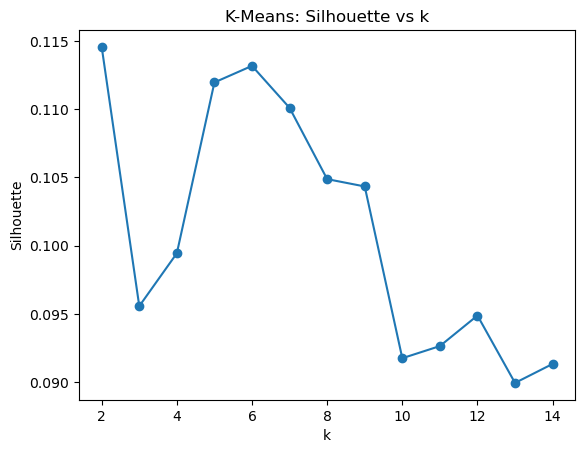

In [ ]:
# กราฟ silhouette
plt.figure()
plt.plot(list(ks), sils, marker='o')
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.title("K-Means: Silhouette vs k")
plt.show()

In [ ]:
# เลือก k ที่ต้องการ
best_k = 6
kmeans_pipe = Pipeline([("prep", preprocessor),
                        ("cluster", KMeans(n_clusters=best_k, n_init=10, random_state=42))])
labels_km = kmeans_pipe.fit_predict(df)
#print(labels_km)

c:\Users\user\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [ ]:
# Convert cluster centers to DataFrame and save to Excel
#centers_df = pd.DataFrame(kmeans_pipe.named_steps['cluster'].cluster_centers_, columns=feature_names)
#centers_df.to_excel("Shopping_km_centers.xlsx", index=False)

In [ ]:
kmeans_pipe.named_steps['cluster'].inertia_

2518.771554725101

In [ ]:
#เพิ่ม label กลับเข้า DataFrame เพื่อวิเคราะห์
df_km = df.copy()
df_km["Cluster"] = labels_km
print("Silhouette (k-means):", silhouette_score(preprocessor.transform(df), labels_km))
df_km.head()

Silhouette (k-means): 0.11317921779270068


,Readymade,Frozenfoods,Alcohol,FreshVegetables,Milk,Bakerygoods,Freshmeat,Toiletries,Snacks,Tinnedgoods,GENDER,Age,MARITAL,CHILDREN,WORKING,Cluster
0,1,0,0,0,0,0,0,0,1,0,Female,18 to 30,Widowed,No,Yes,4
1,1,0,0,0,0,0,0,1,0,0,Female,18 to 30,Separated,No,Yes,4
2,1,0,0,0,0,0,0,1,1,0,Male,18 to 30,Single,No,Yes,1
3,1,0,0,0,1,1,0,0,0,0,Female,18 to 30,Widowed,No,Yes,4
4,1,0,0,0,0,0,0,0,0,0,Female,18 to 30,Separated,No,Yes,4


In [ ]:
#สรุปจำนวนสมาชิกแต่ละคลัสเตอร์
print(df_km["Cluster"].value_counts().sort_index())

Cluster
0    251
1    266
2    269
Name: count, dtype: int64


In [ ]:
profile_km = cluster_profile(df_km, "Cluster", top_cat=5)

In [ ]:
for c, stats in profile_km.items():
    print(f"\n=== Cluster {c} (n={stats['n']}) ===")

    # ตัวเลข: แสดงเฉลี่ย top 10 ตัวแรก (ตัดให้สั้น)
    num_mean = stats["num_mean"]
    for feat, val in list(num_mean.items())[:10]:
        print(f"- {feat}: {val:.3f}")

    # หมวดหมู่: สัดส่วน
    print("Categoricals:")
    for col, props in stats["cat_props"].items():
        pairs = [f"{k}: {v}" for k, v in props.items()]
        print(f"  • {col} -> " + "; ".join(pairs))


=== Cluster 0 (n=251) ===
- Readymade: 0.614
- Snacks: 0.490
- Tinnedgoods: 0.482
- Alcohol: 0.450
- Frozenfoods: 0.430
- Bakerygoods: 0.418
- Milk: 0.219
- Toiletries: 0.088
- FreshVegetables: 0.084
- Freshmeat: 0.040
Categoricals:
  • GENDER -> Female: 100.0%
  • Age -> 31 to 40: 23.5%; 18 to 30: 23.1%; 41 to 50: 20.7%; 51 to 60: 20.3%; Over 60: 12.4%
  • MARITAL -> Married: 24.7%; Widowed: 24.3%; Separated: 19.9%; Single: 19.9%; Divorced: 11.2%
  • CHILDREN -> No: 100.0%
  • WORKING -> Yes: 89.6%; No: 10.4%

=== Cluster 1 (n=266) ===
- Readymade: 0.602
- Alcohol: 0.549
- Frozenfoods: 0.523
- Snacks: 0.410
- Bakerygoods: 0.395
- Tinnedgoods: 0.305
- Milk: 0.199
- Toiletries: 0.109
- FreshVegetables: 0.071
- Freshmeat: 0.030
Categoricals:
  • GENDER -> Male: 100.0%
  • Age -> 18 to 30: 45.5%; 41 to 50: 14.7%; 31 to 40: 14.3%; 51 to 60: 13.2%; Over 60: 12.4%
  • MARITAL -> Single: 38.7%; Separated: 17.3%; Divorced: 15.4%; Widowed: 14.7%; Married: 13.9%
  • CHILDREN -> No: 98.5%; Yes: 

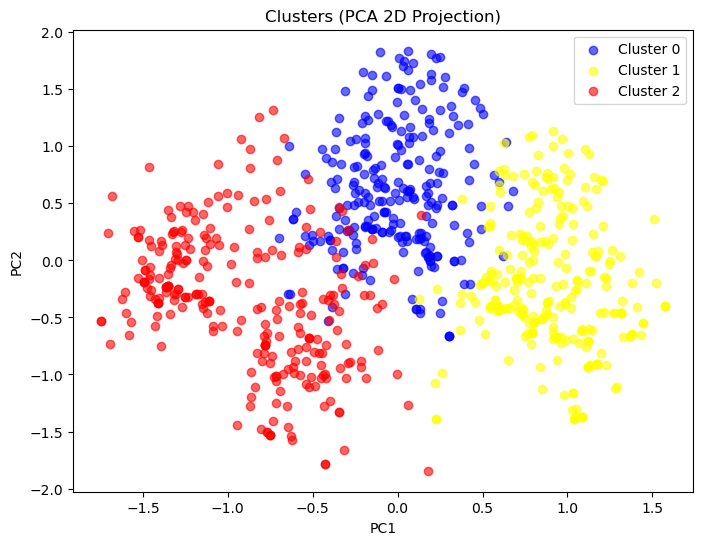

In [ ]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(preprocessor.transform(df))

# สร้าง DataFrame สำหรับ plot
plot_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
plot_df["Cluster"] = labels_km

# Plot scatter
"""
plt.figure(figsize=(8,6))
for c in sorted(plot_df["Cluster"].unique()):
    subset = plot_df[plot_df["Cluster"] == c]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {c}", alpha=0.6)
"""
colors = ['blue', 'yellow', 'red',"orange","black","gray"]

plt.figure(figsize=(8,6))
for i, c in enumerate(sorted(plot_df["Cluster"].unique())):
    subset = plot_df[plot_df["Cluster"] == c]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {c}", alpha=0.6, color=colors[i % len(colors)])


plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters (PCA 2D Projection)")
plt.legend()
plt.show()

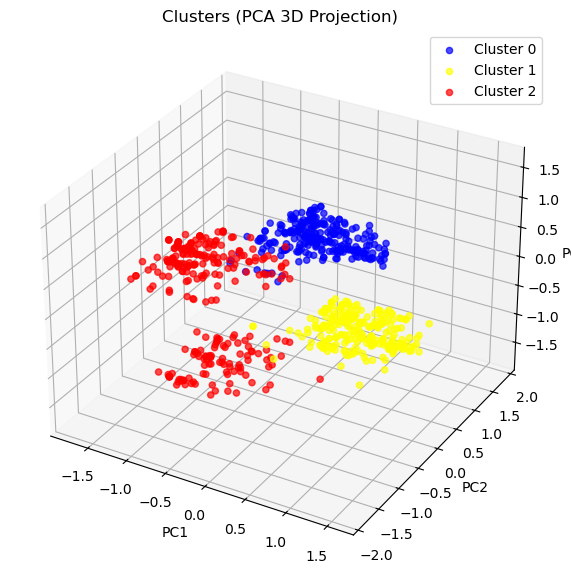

In [ ]:
pca3 = PCA(n_components=3, random_state=42)
X_pca3 = pca3.fit_transform(preprocessor.transform(df))

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")

"""
scatter = ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2],
                     c=labels_km, cmap="tab10", alpha=0.7)
"""

colors = ['blue', 'yellow', 'red',"orange","black","gray"]

for i, c in enumerate(sorted(np.unique(labels_km))):
    subset = X_pca3[labels_km == c]
    ax.scatter(subset[:,0], subset[:,1], subset[:,2],
               label=f"Cluster {c}", alpha=0.7, color=colors[i % len(colors)])

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Clusters (PCA 3D Projection)")
plt.legend()
plt.show()
